<a href="https://colab.research.google.com/github/Avinash-Jha-19/TensorFlow/blob/master/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Avinash Jha**


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

https://github.com/Avinash-Jha-19/TensorFlow/blob/master/Yes_Bank_Stock_Closing_Price_Prediction.ipynb

# **Problem Statement**


Conduct a comprehensive regression analysis using multiple models to forecast the stock's closing price. Assess and compare the performance of these models using various evaluation metrics to identify the most suitable model.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

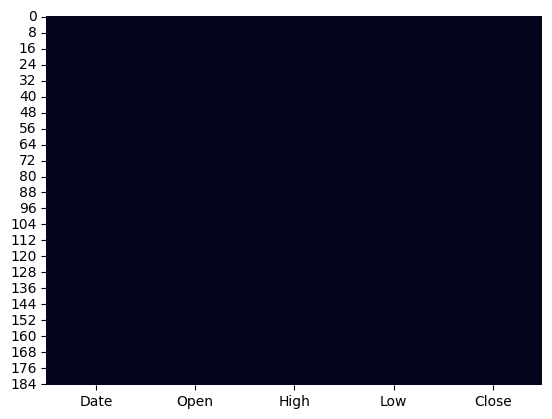

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

In [ ]:
# Check for NaN values in the entire DataFrame
nan_values = df.isna().sum()
print("NaN Values in Entire DataFrame:")
print(nan_values)


NaN Values in Entire DataFrame:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### What did you know about your dataset?

*   The data set consists of 185 rows and 5 columns.
*   This dataset has no NULL values. But the Dtype of Date column is object.
*   This dataset has 0 duplicate values.
*   No Null or Missing or NaN values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**Observations**
* Here our dependent variables are Open, High, and Low. Independent variable is Close.
*   We'll use the Date column as an Index. Time Series analysis can be performed but since it is later in the module so right now I don't have the necessary knowledge.

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f"The number unique values in {i} are {df[i].nunique()}.")

The number unique values in Date are 185.
The number unique values in Open are 183.
The number unique values in High are 184.
The number unique values in Low are 183.
The number unique values in Close are 185.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Copying data to keep the original file
bank_df = df.copy()

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
bank_df['Date'] = pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
bank_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# Setting the date column as index
bank_df.set_index('Date', inplace = True)

In [ ]:
bank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


## EDA

<Axes: xlabel='Close', ylabel='Density'>

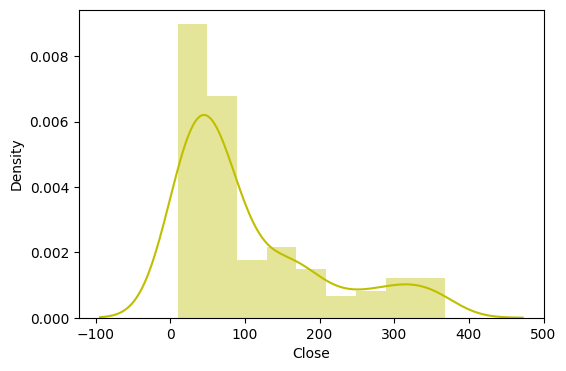

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(6,4))
sns.distplot(bank_df['Close'],color="y")

**Observations**
*   The independent variable Close is positively skewed, so will do a logarithmic transformation on it.

<Axes: xlabel='Close', ylabel='Density'>

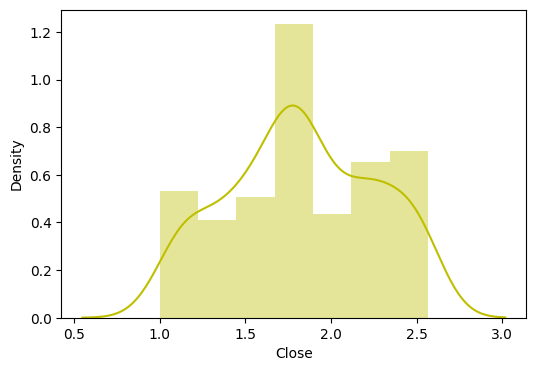

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(6,4))
sns.distplot(np.log10(bank_df['Close']),color="y")

**Observations**
*   After the logarithmic transformation now it is somewhat similar to the normal distribution.

In [ ]:
#separating Numerical Features
numerical_features = bank_df.describe().columns
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

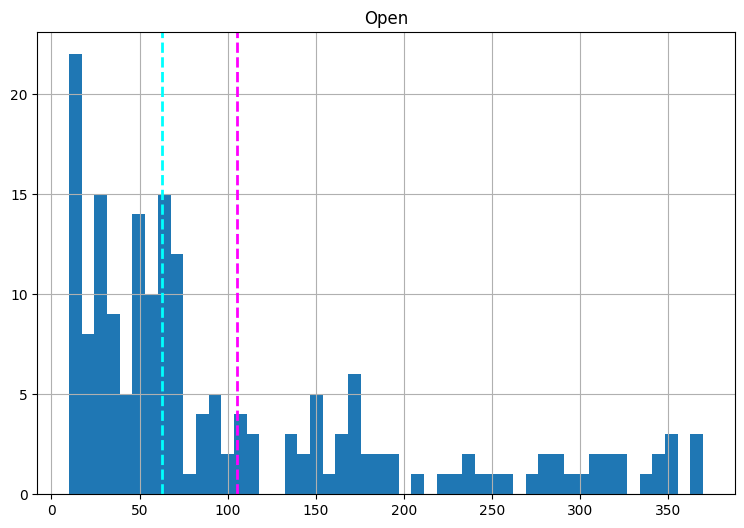

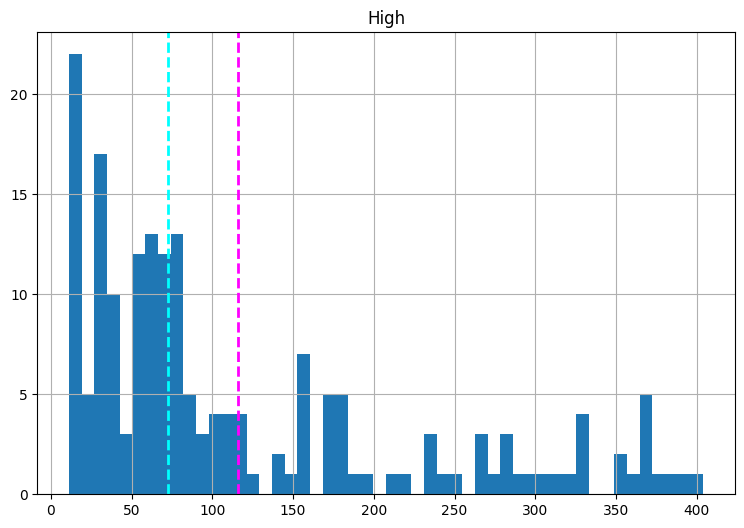

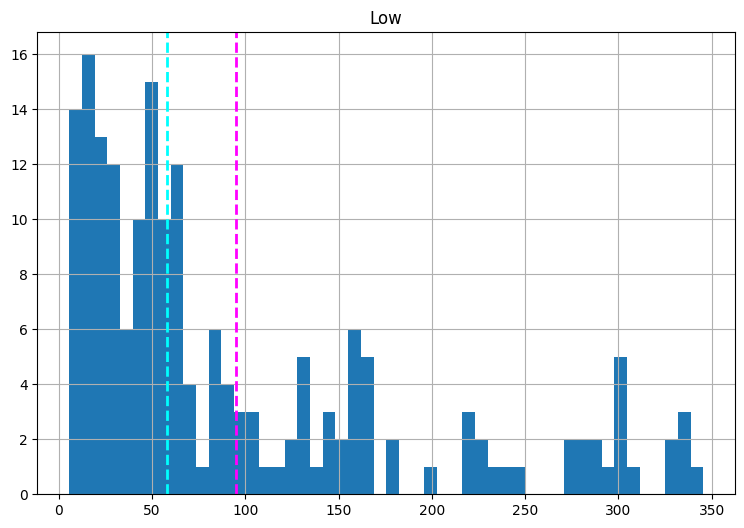

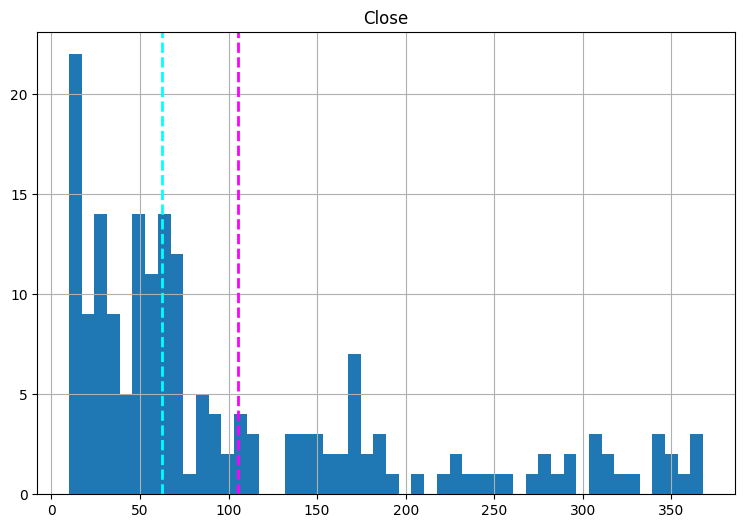

In [ ]:
#Plotting a bar plot for each numerical feature count
for col in numerical_features[:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = bank_df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

*   The distribution of these features is skewed as visualized from the graph.

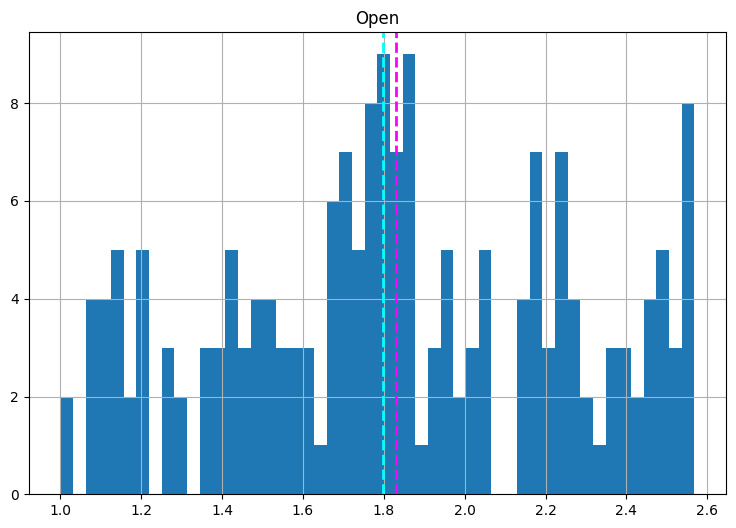

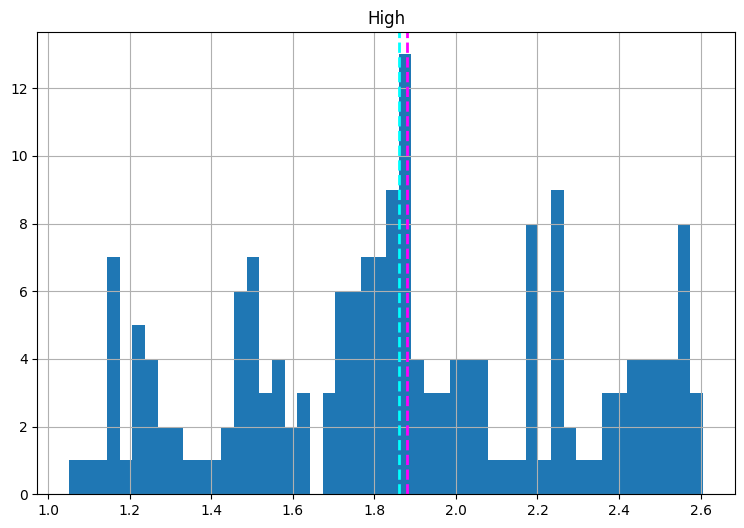

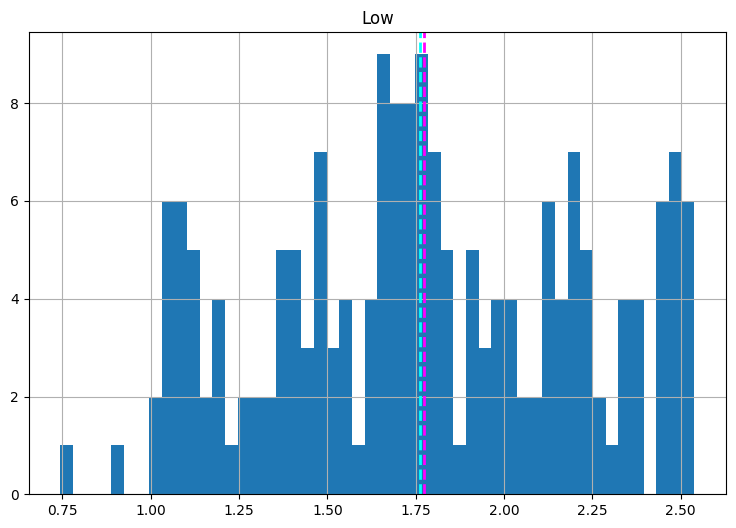

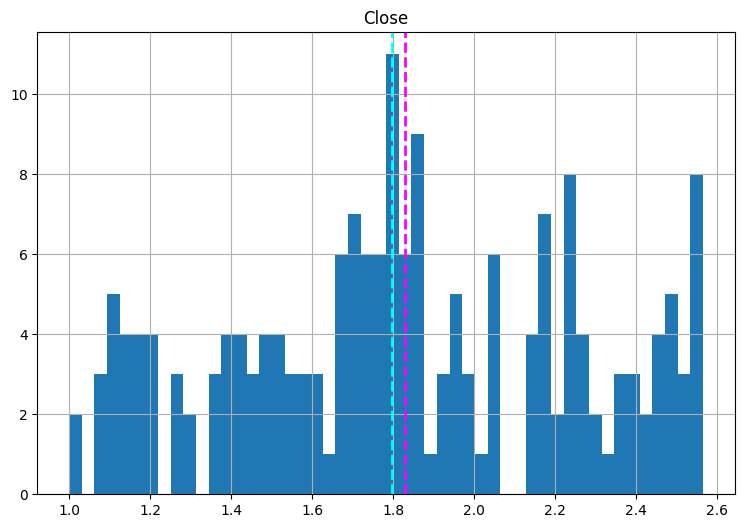

In [ ]:
# Performing log10 transformation on the above plots
for col in numerical_features[:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = np.log10(bank_df[col])
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

*   After applying the logrithamic transfromation the distribution is close to normal.

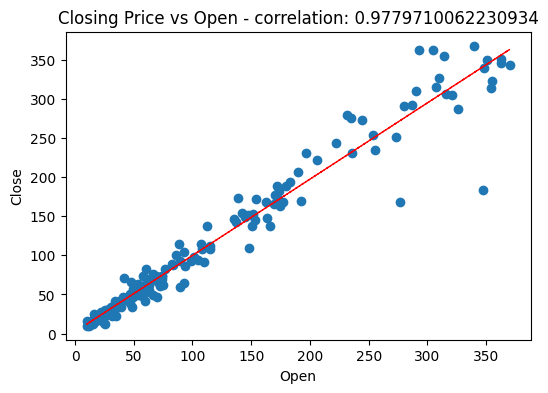

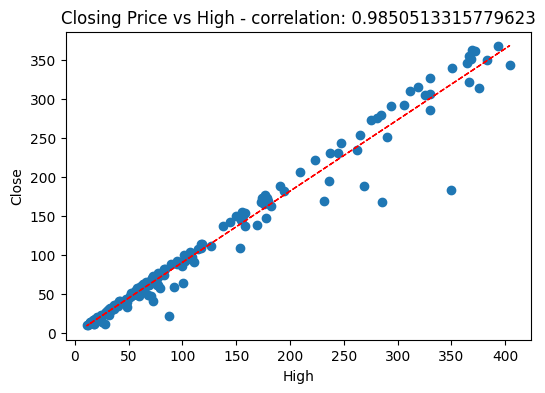

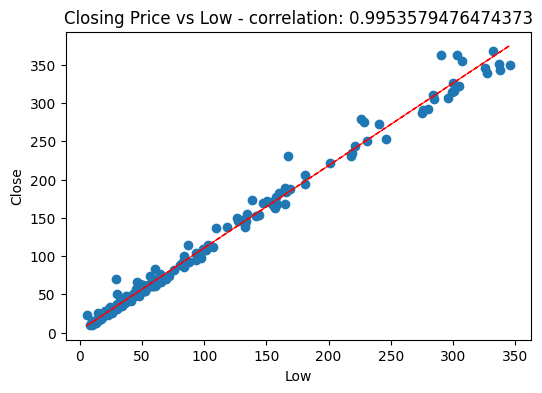

In [ ]:
# Checking the relationship between the dependent variables and the independent variable.

for col in numerical_features[:3]:
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  feature = bank_df[col]
  label = bank_df['Close']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Closing Price vs ' + col + ' - correlation: ' + str(correlation))
  z = np.polyfit(bank_df[col], bank_df['Close'], 1)
  y_hat = np.poly1d(z)(bank_df[col])
  plt.plot(bank_df[col], y_hat, "r--", lw=1)

plt.show()

**Observations**
*   From the above graphs it is clear that the dependent variables have a linear relation with the target variable.

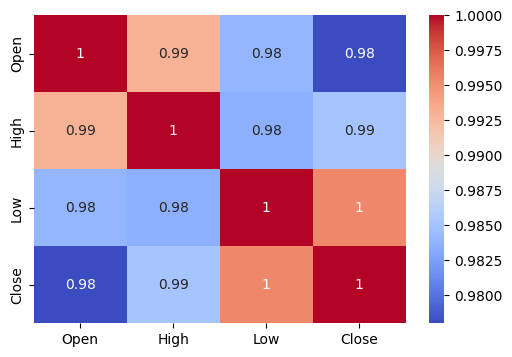

In [ ]:
# Correlation plot
plt.figure(figsize=(6,4))
sns.heatmap(bank_df.corr(), annot = True, cmap='coolwarm')
plt.show()

In [ ]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


**Observations**
-   Despite high VIF scores indicating potential multicollinearity among features, we have decided not to perform feature engineering for this use case. Each feature is deemed crucial for predicting future values, mirroring real-world scenarios where all variables contribute to accurate predictions.
-   Tried to transform 'High' and 'Low' into a 'Day Range' unexpectedly increased errors substantially, reinforcing the importance of retaining all original features.

In [ ]:
# Creating an empty dataframe
a = 0
error_df = pd.DataFrame()

*   The above empty dataframe is to store the error values and we'll be able to compare them at one place.

**Identify Input & Target**
*   The column Close contains the value we need to predict i.e. it's the target column.
*   Data from all the other columns (except date) can be used as inputs to the model.

*   Create a list X of column names containing data that can be used as input to train the model, and identify the target column as the variable y.

*   Make sure that the Close column is not included in X.

*   Now that we've identified the input and target columns, we can separate input & target data.



In [ ]:
print(numerical_features)

Index(['Open', 'High', 'Low', 'Close'], dtype='object')


In [ ]:
X = bank_df.drop(columns = ['Close'], axis = 1)
y = bank_df['Close']

**Spliting Training and Testing Set**
*   Finally, let's split the dataset into a training and testing set. We'll have a testing data as 20% of the gievn data frame and the rest for training the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Let's check the shape of the train and test dataset

print(f'Independent Variables Set: \n Shape of X_train = {X_train.shape} \n Shape of X_test = {X_test.shape}\n')
print(f'Dependent Variables Set: \n Shape of y_train = {y_train.shape} \n Shape of y_test = {y_test.shape}')

Independent Variables Set: 
 Shape of X_train = (148, 3) 
 Shape of X_test = (37, 3)

Dependent Variables Set: 
 Shape of y_train = (148,) 
 Shape of y_test = (37,)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression Model Evaluation Metrics

1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the predicted values and the actual values.
   - It penalizes larger errors more heavily due to the squaring, making it sensitive to outliers.
   - Values can range from 0 to positive infinity, where lower values indicate better model performance.
   - Formula: MSE = (1/n) * Σ(predicted - actual)^2, where n is the number of data points.
   

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of the MSE and represents the average magnitude of errors in the same unit as the target variable.
   - It provides a more interpretable measure of error compared to MSE.
   - Similar to MSE, lower RMSE values are preferred, and the range is 0 to positive infinity.
   - Formula: RMSE = √MSE

3. **Mean Absolute Error (MAE)**:
   - MAE calculates the average absolute difference between the predicted values and the actual values.
   - It is less sensitive to outliers compared to MSE.
   - Values range from 0 to positive infinity, and lower MAE values signify better model accuracy.
   - Formula: MAE = (1/n) * Σ|predicted - actual|

4. **Mean Absolute Percentage Error (MAPE)**:
   - MAPE measures the percentage difference between the predicted and actual values relative to the actual values.
   - It quantifies the relative size of errors.
   - MAPE values are expressed as percentages, ranging from 0% to positive infinity. Smaller percentages indicate better predictions.
   - Formula: MAPE = (1/n) * Σ(|(actual - predicted) / actual|) * 100%

5. **R-squared (R2)**:
   - R2 is a measure of how well the regression model fits the data.
   - It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - Values range from 0 to 1, where 0 indicates that the model doesn't explain any variance, and 1 suggests a perfect fit. Higher values are desirable, indicating a better fit to the data.
   - Formula: R2 = 1 - (MSE of the model / MSE of the baseline model)

6. **Adjusted R-squared (Adjusted R2)**:
   - Adjusted R2 adjusts the R2 value based on the number of predictors in the model.
   - It penalizes the inclusion of unnecessary predictors, preventing overfitting.
   - It is particularly useful when comparing models with different numbers of predictors.
   - Similar to R2, values range from 0 to 1, with higher values indicating better model fit.
   - Formula: Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - k - 1)], where n is the number of data points and k is the number of predictors.

These metrics are essential for assessing the performance of regression models,and their values provide valuable insights into how well the model is performing in terms of prediction accuracy, fit to the data, and handling of variability, which in turn helps in selecting the most appropriate model for a given problem.

## Implementing Linear Regression

- Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.
- When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression. In this case, it is a Multivariate Analysis.
- The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression()

In [ ]:
reg.score(X_train, y_train)

0.9954546486753905

In [ ]:
reg.coef_

array([-155.44880876,  176.73898094,  344.80781882])

In [ ]:
# get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
y_train

Date
2014-12-01    154.57
2006-03-01     20.08
2013-07-01     64.76
2019-09-01     41.45
2009-04-01     15.45
               ...  
2014-02-01     60.95
2011-02-01     51.29
2015-04-01    167.96
2009-06-01     29.68
2019-11-01     68.30
Name: Close, Length: 148, dtype: float64

In [ ]:
y_pred_train

array([146.72027095,  20.28592336,  65.8819852 ,  50.44793759,
        15.23561451,  61.85459823,  52.53284857,  40.16908149,
        35.88878199,  14.56659276,  91.13869624,  15.20258174,
        37.19691384,  30.46051212, 322.99740094,  74.34827852,
       344.748914  ,  26.32583016,  44.9194814 ,  56.59897505,
       324.18535689,  14.60694255, 105.13765118,  34.24371924,
       114.01511869,  58.95363472, 341.10436552,  68.4153446 ,
       106.34362922, 142.70175837,  39.07061985,  95.5183451 ,
       108.5221471 , 135.40964254,  16.14727243,  95.56998849,
        70.48676464,  14.85875244,  57.62715879,  79.85364268,
       181.75839869,  11.92318773,  18.87174117, 104.58962448,
        54.66082337,  29.43057942, 107.82444302, 168.75484434,
       126.78760947,  47.6880133 , 375.15383567,  26.34916657,
        38.18668733, 152.84772757,  94.01466327,  64.49183669,
       198.71878378,  14.96237912,  67.18542936,  33.10529786,
        28.94244475,  70.20472972,  19.00292338, 294.02

In [ ]:
#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
#Calculate MSE
MSE = mean_squared_error(y_test ,y_pred_test)
print("MSE:" , MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:" , RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test)
print("MAE:",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score(y_train, y_pred_train)
print("R2 :",R2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) )))
print("Adjusted R2 :",Adjusted_R2 )

MSE: 77.8729862468524
RMSE: 8.824567198840542
MAE: 5.397623269661967
MAPE : 5.26439076899304
R2 : 0.9954546486753905
Adjusted R2 : 1.0833617308699721


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='Linear regression'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

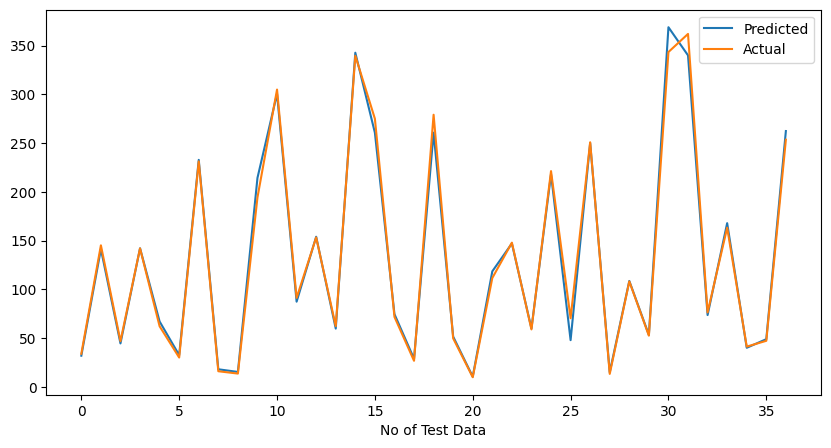

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## Implementing Lasso Regression

Lasso regression stands for Least Absolute Shrinkage and Selection Operator, also known as L1 regularization, is a linear regression technique used in machine learning and statistics for various purposes:
- Feature Selection: Selects essential features by driving unimportant feature coefficients to zero.

- Regularization: Prevents overfitting by adding coefficient penalties, ensuring model robustness.

- Automatic Variable Selection: Automatically identifies key predictors, aiding model interpretability.

- Sparse Models: Ideal for datasets where only a few features are meaningful, enhancing efficiency.

It is widely used in data science for improving model interpretability and generalization while handling high-dimensional datasets effectively.






In [ ]:
# Fitting the data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.9954546423378068

In [ ]:
lasso.coef_

array([-155.19155634,  176.5245062 ,  344.76010152])

In [ ]:
# get the X_train and X-test value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
# Clalculate MSE
MSE = mean_squared_error(y_test, y_pred_test_lasso)
print("MSE:",MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_lasso)
print("MAE :",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_test_lasso)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_test_lasso))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 77.93505686271088
RMSE: 8.82808341956004
MAE : 5.399262814680368
MAPE : 5.265898354553138
R2: 0.9930760721359967
Adjusted R2: 0.99244662414836


In [ ]:
# Hyperprarameter tuning
# Performing Grid Search Cross Validation

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -57.289583968804436


In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

In [ ]:
# Clalculate MSE
MSE = mean_squared_error(y_test, y_pred_lasso_test)
print("MSE:",MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_lasso_test)
print("MAE :",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_lasso_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_lasso_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_lasso_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 84.5868920824471
RMSE: 9.197113247233998
MAE : 5.554094881429247
MAPE : 5.26439076899304
R2: 0.992485107952756
Adjusted R2: 0.9918019359484611


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='Lasso Regression'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

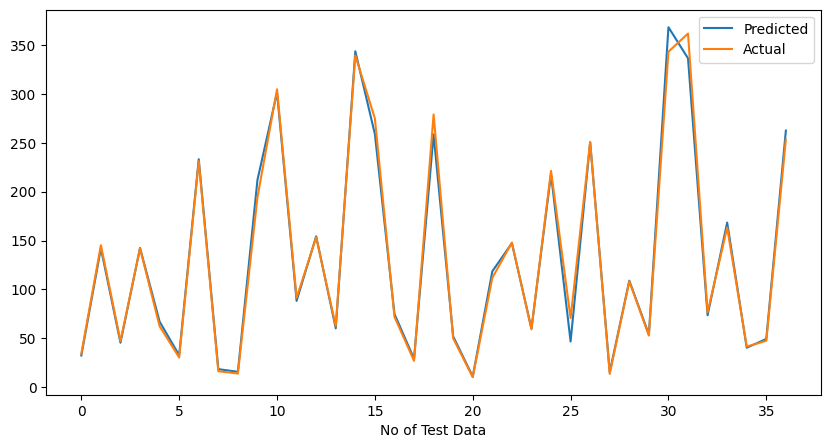

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_lasso_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## Implementing Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.
- Regularization Technique: Ridge Regression, a type of linear regression, employs L2 regularization.
- Feature Balancing: It prevents overfitting by adding a penalty term based on the square of coefficients, which encourages a balance among feature weights.
- Less Feature Selection: Ridge doesn't drive coefficients to zero; it retains all features, making it suitable when all predictors are potentially relevant.
- Continuous Coefficients: Ridge keeps all coefficients, making it less effective for feature selection compared to Lasso.

The difference between Ridge and Lasso regression is that Lasso tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

In [ ]:
ridge= Ridge(alpha = 0.1)

In [ ]:
#Fit the Model
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
#Check the Score
ridge.score(X_train, y_train)

0.9932571550457806

In [ ]:
#Get the X_train and X-test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [ ]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :",MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE:",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_test_ridge)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_test_ridge))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )

MSE : 116.28008752067961
RMSE : 10.783324511516827
MAE: 6.038398984483052
MAPE : 5.7594933421266825
R2: 0.9896694123232443
Adjusted R2 : 0.9887302679889939


In [ ]:
# Hyperprarameter tuning
# Performing Grid Search Cross Validation

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.819611827080514


In [ ]:
y_pred_ridge_train = ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

In [ ]:
# Clalculate MSE
MSE = mean_squared_error(y_test, y_pred_ridge_test)
print("MSE:",MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_ridge_test)
print("MAE :",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_ridge_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_ridge_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_ridge_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_ridge_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 83.6100619624776
RMSE: 9.143853780681185
MAE : 5.485457740724113
MAPE : 5.320370202823919
R2: 0.9925718917642822
Adjusted R2: 0.9918966091973987


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='Ridge Regression'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

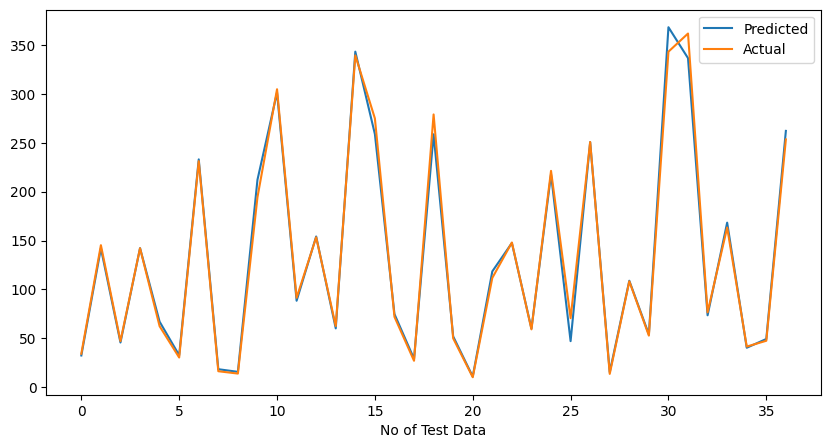

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_ridge_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## ELASTIC NET REGRESSION

- Hybrid Regularization: Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization techniques.
- Balanced Benefits: It balances feature selection (like Lasso) and regularization (like Ridge), offering flexibility in handling feature sparsity and multicollinearity.
- Feature Subset Selection: Useful when some features are important while others should be reduced to zero.
- Continuous and Sparse Models: Elastic Net suits scenarios where both continuous coefficients and sparse models are desired.

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.9432590356230784

In [ ]:
#Get the X_train and X-test value
y_pred_train_en = elasticnet.predict(X_train)
y_pred_test_en = elasticnet.predict(X_test)

In [ ]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_en)
print("MSE :",MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_test_en)
print("MAE:",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_test_en)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_test_en))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score((y_test),(y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )

MSE : 714.7977392864235
RMSE : 26.73570158582758
MAE: 19.214660157475645
MAPE : 28.01657822848174
R2: 0.9364957416674465
Adjusted R2 : 0.930722627273578


In [ ]:
# Hyperprarameter tuning
# Performing Grid Search Cross Validation

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error',cv = 3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -55.069429269183026


In [ ]:
y_pred_elastic_train = elastic_regressor.predict(X_train)
y_pred_elastic_test = elastic_regressor.predict(X_test)

In [ ]:
# Clalculate MSE
MSE = mean_squared_error(y_test, y_pred_elastic_test)
print("MSE:",MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_elastic_test)
print("MAE :",MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_elastic_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_elastic_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_elastic_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_elastic_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 83.83081584967007
RMSE: 9.155916985734967
MAE : 5.488245348251899
MAPE : 5.321994036532267
R2: 0.9925522794864171
Adjusted R2: 0.9918752139851823


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='Elastic Net Regression'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

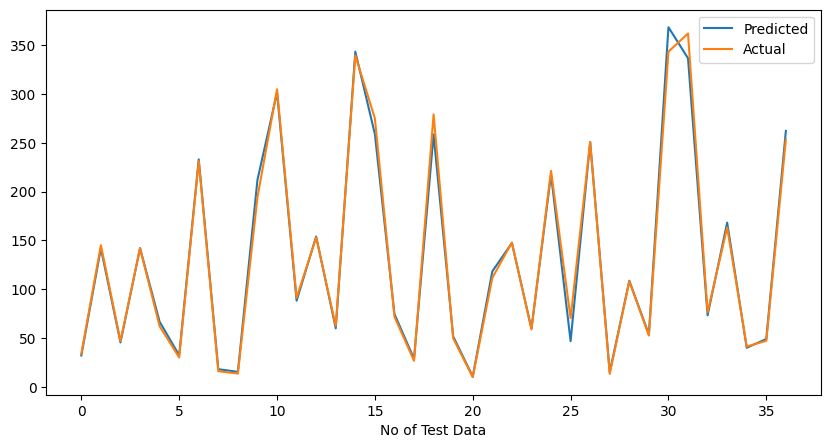

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_elastic_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## Decision Tree Regressor

- Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
- Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.
- Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.
- Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

In [ ]:
# Creating a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=9, splitter='best', max_features='auto', random_state=42)

In [ ]:
# Fitting the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=42)

In [ ]:
# Predictions on the testing data
y_pred_tree_test = regressor.predict(X_test)

In [ ]:
# Calculate MSE
MSE = mean_squared_error(y_test, y_pred_tree_test)
print("MSE:", MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_tree_test)
print("MAE:", MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_tree_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_tree_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_tree_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_tree_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 241.61904256756748
RMSE: 15.544099927868691
MAE: 9.277702702702703
MAPE : 6.951486451711382
R2: 0.978534014233743
Adjusted R2: 0.976582560982265


In [ ]:
# Defining the hyperparameter grid to search
# Performing Grid Search Cross Validation

param_grid = {
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV
decision_tree_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
decision_tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=9, max_features='auto',
                                             random_state=42),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,decision_tree_regressor.best_params_)
print("\nUsing ",decision_tree_regressor.best_params_, " the negative mean squared error is: ", decision_tree_regressor.best_score_)

The best fit alpha value is found out to be : {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}

Using  {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}  the negative mean squared error is:  -162.37230497313294


In [ ]:
# Predictions on the testing data
y_pred_tree_test = decision_tree_regressor.predict(X_test)

In [ ]:
# Calculate MSE
MSE = mean_squared_error(y_test, y_pred_tree_test)
print("MSE:", MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_tree_test)
print("MAE:", MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_tree_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_tree_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_tree_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_tree_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 298.24067853939124
RMSE: 17.269646161383598
MAE: 9.784931145431141
MAPE : 7.153949626458288
R2: 0.9735036191998191
Adjusted R2: 0.9710948573088936


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='Decision Tree Regressor'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

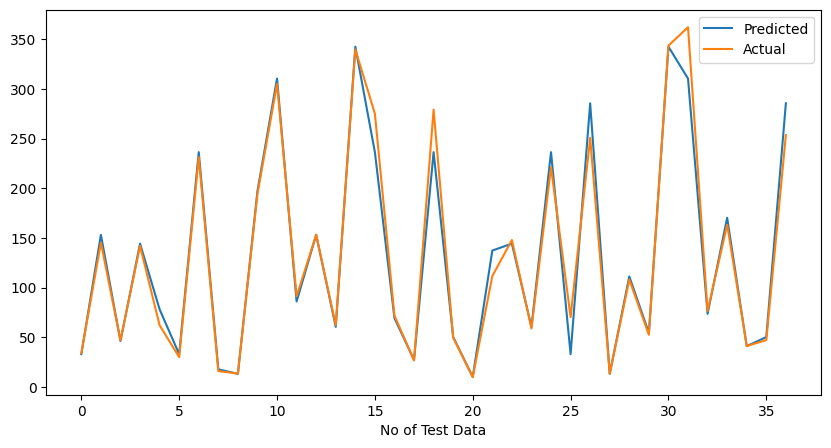

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_tree_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## KNN

- Instance-Based Learning: KNN Regressor is an instance-based or lazy learning algorithm. It predicts values by considering the k-nearest data points in the training set.

- Distance Metric: It relies on a distance metric (e.g., Euclidean distance) to measure similarity between data points and chooses the most frequent value among the k-nearest neighbors.

- Hyperparameter Tuning: The choice of the 'k' value significantly affects the model's performance, and it requires careful tuning.

- Sensitive to Data Density: KNN is sensitive to the density of data points in the feature space, making it effective for localized patterns but less so for global patterns.

In [ ]:
# Import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Setup arrays to store training and testing scores (e.g., R-squared)
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a KNeighborsRegressor with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute R-squared on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute R-squared on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


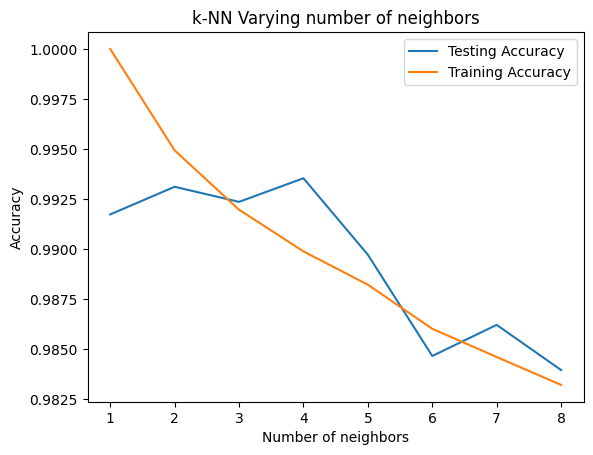

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.9923619275398143

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred_knn = knn.predict(X_test)

In [ ]:
# Calculate MSE
MSE = mean_squared_error(y_test, y_pred_knn)
print("MSE:", MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_knn)
print("MAE:", MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_knn)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_knn))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_knn)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_knn)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 85.9733987987989
RMSE: 9.272184143922019
MAE: 6.0347747747747755
MAPE : 4.9946330050093515
R2: 0.9923619275398143
Adjusted R2: 0.9916675573161611


In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
# Hyperprarameter tuning
# Performing Grid Search Cross Validation

knn_reg = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 3, scoring='neg_mean_squared_error')

# Fit GridSearchCV to your data
knn_reg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,knn_reg.best_params_)
print("\nUsing ",knn_reg.best_params_, " the negative mean squared error is: ", knn_reg.best_score_)

The best fit alpha value is found out to be : {'n_neighbors': 2}

Using  {'n_neighbors': 2}  the negative mean squared error is:  -139.42628919727895


In [ ]:
# Predictions on the testing data
y_pred_knn_test = knn_reg.predict(X_test)

In [ ]:
# Calculate MSE
MSE = mean_squared_error(y_test, y_pred_knn_test)
print("MSE:", MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred_knn_test)
print("MAE:", MAE)

#Calculate MAPE
MAPE=mape(y_test, y_pred_knn_test)
print("MAPE :" ,MAPE)

#Calculate R2 and Adjusted R2
R2 = r2_score((y_test),(y_pred_knn_test))
print("R2:",R2)
Adjusted_R2 = (1-(1-r2_score((y_test),(y_pred_knn_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_knn_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 77.49780405405397
RMSE: 8.803283708597263
MAE: 5.972432432432427
MAPE : 5.31932699899449
R2: 0.9931149186708854
Adjusted R2: 0.9924890021864204


In [ ]:
#Inserting errors in dataframe
error_df.loc[a,"Model_Name"]='KNN Regressor'
error_df.loc[a,"MSE"]=round(MSE,2)
error_df.loc[a,"RMSE"]=round(RMSE,2)
error_df.loc[a,"MAE"]=round(MAE,2)
error_df.loc[a,"MAPE"]=round(MAPE,2)
error_df.loc[a,"R2"]=round(R2,2)
error_df.loc[a,"Adjusted R2"]=round(Adjusted_R2,2)

a+=1

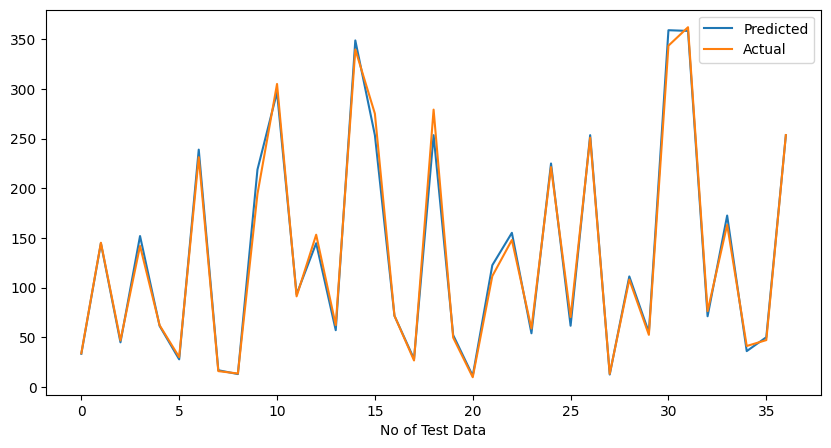

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_knn_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## Comparing Metrics

In [ ]:
#sorting metrics
error_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [ ]:
error_df

,Model_Name,MSE,RMSE,MAE,MAPE,R2,Adjusted R2
0,Linear regression,77.87,8.82,5.40,5.26,1.00,1.08
2,Ridge Regression,83.61,9.14,5.49,5.32,0.99,0.99
3,Elastic Net Regression,83.83,9.16,5.49,5.32,0.99,0.99
1,Lasso Regression,84.59,9.20,5.55,5.26,0.99,0.99
5,KNN Regressor,77.50,8.80,5.97,5.32,0.99,0.99
4,Decision Tree Regressor,298.24,17.27,9.78,7.15,0.97,0.97


# **Conclusion**

1. **Overall Model Performance**:
   - All regression models have achieved relatively high accuracy, with R-squared (R2) values close to 1, indicating that the models explain a substantial portion of the variance in the stock closing price.

2. **Linear Regression**:
   - Linear Regression stands out as the top-performing model, with the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) scores among the models.
   - The high R2 and Adjusted R2 scores (close to 1.0) suggest that Linear Regression captures the relationship between the input variables and the stock closing price effectively.

3. **Ridge Regression and Lasso Regression**:
   - Ridge and Lasso Regression have performed similarly and slightly less well than Linear Regression.
   - These regularization techniques were employed to mitigate multicollinearity and feature selection but resulted in higher MAE, MSE, RMSE, and MAPE compared to Linear Regression.
   - The relatively high R2 and Adjusted R2 scores (close to 1.0) indicate that these models still provide a good fit but not as good as Linear Regression.

4. **K-Nearest Neighbors (KNN) Regression**:
   - KNN Regression has delivered competitive results with an R2 score of 0.99, similar to Linear Regression.
   - However, it has a slightly higher MAE, MSE, RMSE, and MAPE compared to Linear Regression.

5. **Decision Tree Regressor**:
   - The Decision Tree Regressor has the highest MSE, RMSE, MAE, and MAPE among the models, indicating that it may not generalize well to unseen data.
   - The R2 and Adjusted R2 scores, while still relatively high (around 0.97), are lower compared to other models, suggesting that the model might be overfitting.

In summary, Linear Regression appears to be the preferred model for this stock price prediction task, as it provides the best overall performance in terms of error metrics. KNN Regression is a competitive alternative. Ridge and Lasso Regression, while performing well, do not outperform Linear Regression in this specific case. The Decision Tree Regressor, despite high R2 scores, exhibits significantly higher errors and may require further tuning to improve generalization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***